# Rendu 
# Supervised Machine Learning
OSORNIO Patrick
DE GABRIAC Elie
4 IR A

Github Link : https://github.com/posornio/TP_ML 

# Lab n°1 : Perceptron


## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1790).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [3]:
# Import some useful libraries and functions

import numpy as np
import pandas
from matplotlib import pyplot as plt

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [4]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp1/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


### Explore the dataset

- how many examples are there in the dataset?
- how many features for each example?
- what is the ground truth of the 10th example

In [5]:
# load the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features -  all rows with all elements in rows except last one
Y = dataset[:, -1]  # ground truth - last element in all rows

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")


f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


The following command adds a column to the inputs.

- what is in the value added this column?
A column filled with 1.
- why are we doing this?
To account for the bias.


In [6]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)


           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/2223-ae/tp1/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

- Complete the code snippet below to:
  - create the vector of weight `w`, initialize to arbitrary values (we suggest 0)
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples

In [7]:
w = np.ones(7) # TODO

def h(w,x):
    ret = w[0]
    for i in range(1,len(x)-1):
         ret+=w[i]*x[i]
    return ret
print(h(w,X[1]))
# print the ground truth and the evaluation of h_w on the first example

8.475


## Loss function

Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.

In [8]:
def loss(w, x, y):
    return (y-h(w,x))**2
print(loss(w,X[5],Y[5]))

88.13454399999999


## Empirical loss

Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.

In [9]:
def emp_loss(w, X, Y):
    ret = 0
    for i in range(len(X)):
        ret+=loss(w,X[i],Y[i])/len(X)
    return ret
print(emp_loss(w,X,Y))

231.65118556493513


## Gradient update

A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

(you can look at slide 32 of the ANN lecture slides for an example)

In [10]:
def compute_update(w, X, Y, alpha):
    ret= w.copy()
    for i in range(len(w)):
        somme=0
        for j in range(len(X)):
            somme+= (Y[j]-h(w,X[j]))*X[j][i]
        ret[i] = w[i]+alpha*somme
    return ret
print(compute_update(w,X,Y,10e-7))

[0.99980928 0.99988731 0.99988814 0.99903486 0.99912295 0.9993717
 1.00032576]


## Gradient descent

Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights

228.90540531851602


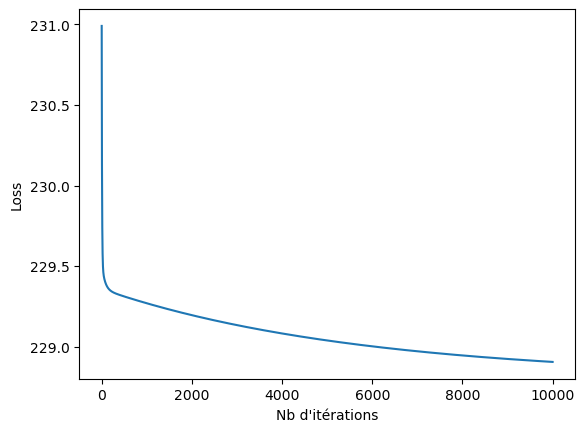

In [11]:
w = np.ones(len(X[0]))
def descent(w_init, X, Y, alpha, max_iter):
    loss = []
    w_aux=compute_update(w_init, X, Y, alpha )
    for i in range (max_iter):
        w_aux=compute_update(w_aux, X, Y, alpha )
        loss.append(emp_loss(w_aux,X,Y))
    plt.plot(loss)
    plt.xlabel("Nb d'itérations")
    plt.ylabel("Loss")
    return w_aux
e = descent(w,X,Y,10e-5,10000)
print(emp_loss(e,X,Y))

## Exploitation

You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
- What is the loss associated with the final model?
- Is the final model the optimal one for a perceptron?


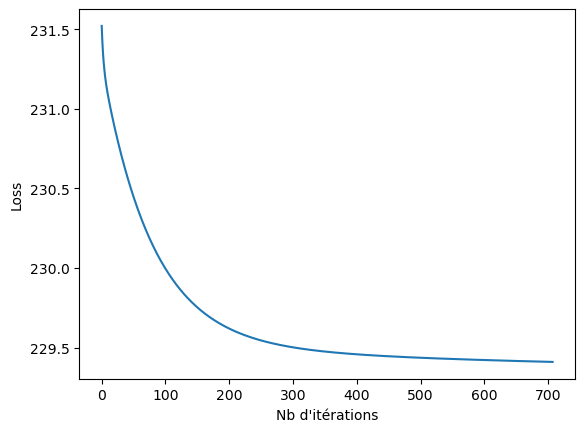

In [40]:
w = np.ones(len(X[0]))

# TODO
def perceptron(w_init, X, Y, alpha, max_iter,conv):
    v1=compute_update(w_init, X, Y, alpha )
    v2 =compute_update(v1, X, Y, alpha )
    loss=[]
    i=0
    while((abs(emp_loss(v1,X,Y)-emp_loss(v2,X,Y))>conv) & (i < max_iter)):
        i+=1
        loss.append(emp_loss(v1,X,Y))
        v1=v2
        v2=compute_update(v1, X, Y, alpha )
    #plt.plot(loss)
    #plt.xlabel("Nb d'itérations")
    #plt.ylabel("Loss")
    return v1

def perceptron_with_plot(w_init, X, Y, alpha, max_iter,conv):
    v1=compute_update(w_init, X, Y, alpha )
    v2 =compute_update(v1, X, Y, alpha )
    loss=[]
    i=0
    while((abs(emp_loss(v1,X,Y)-emp_loss(v2,X,Y))>conv) & (i < max_iter)):
        i+=1
        loss.append(emp_loss(v1,X,Y))
        v1=v2
        v2=compute_update(v1, X, Y, alpha )
    plt.plot(loss)
    plt.xlabel("Nb d'itérations")
    plt.ylabel("Loss")
    return v1
w=perceptron_with_plot(w,X,Y,10e-6,10e3,10e-5)
# we can see that the loss converges to 230, we tested several values of alpha
#if alpha is too small, the loss converges to 230 more slowly



308


Text(0, 0.5, 'f(examples)')

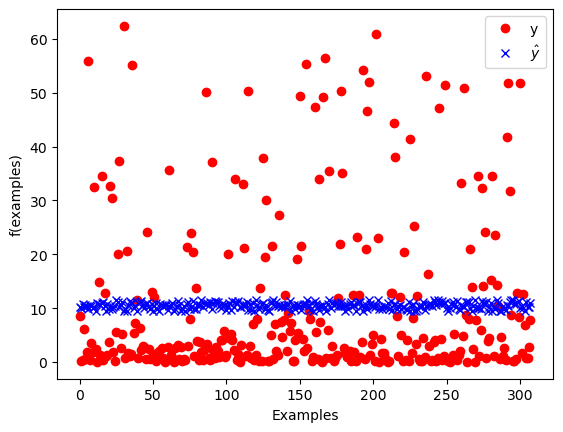

In [27]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
# Code sample that can be used to visualize the difference between the ground truth and the prediction

num_samples_to_plot = 1000
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
yw = [h(w,x) for x in X]
print(len(yw))
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")









# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.

### Improvements to gradient descent

Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations


### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```

Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?

308


Text(0, 0.5, 'f(examples) fit')

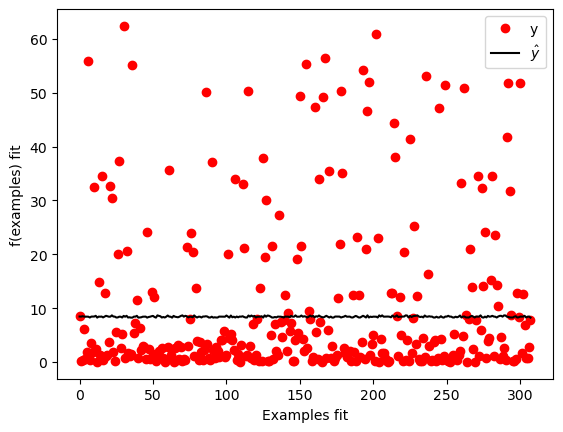

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
def perceptron2(w_init, X, Y, alpha, max_iter,conv):
    X_normalied = sc.fit_transform(X)
    X_normalied = np.insert(X_normalied, 0, np.ones((len(X))), axis= 1)
    return perceptron(w_init, X_normalied, Y, alpha, max_iter,conv)
w = np.zeros(len(X[0]))
plt.close()
X2 = X.copy()
Y2 = Y.copy()
w2=perceptron2(w,X2,Y2,10e-6,10e3,10e-5)
num_samples_to_plot = 1000
plt.plot(Y2[0:num_samples_to_plot], 'ro', label='y')
yw2 = [h(w2,x) for x in X2]
print(len(yw2))
plt.plot(yw2[0:num_samples_to_plot], 'k', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples fit")
plt.ylabel("f(examples) fit")

# Lab n°2 : Multi Layer Perceptron


# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [6]:
# Importing the dataset
import numpy as np
import math
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [3]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [7]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

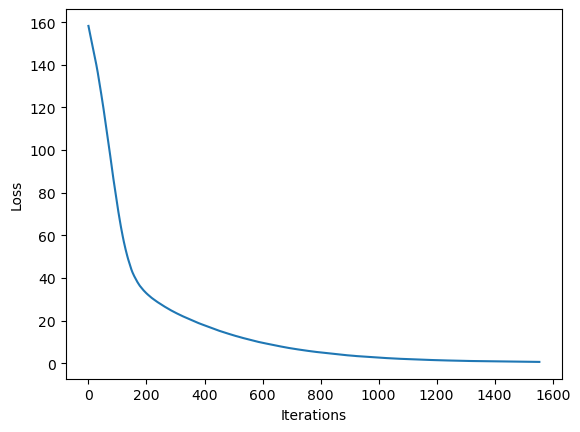

In [8]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'f(examples)')

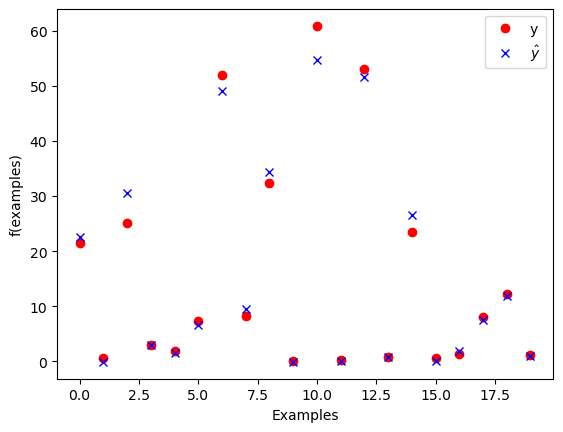

In [10]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.

- What is the structure of the network?
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?
- How does the training algorithm decides to stop the training?

### Response

- What is the structure of the network?

There are currently 100 neurons per hidden layer
the activation function is relu, the rectified linear unit function, returns f(x) = max(0, x) .

- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses? How does the training algorithm decides to stop the training?

The algorithme uses for traing is adam. 
the Stochastic gradient descent was mentioned furing the courses.

- How does the training algorithm decides to stop the training ?

Maximum number of iterations:
    You can set a maximum limit on the number of times the training process goes through the data.You can control this using the "max_iter" parameter.

Tolerance:
    If the improvement in the loss function or the validation score becomes very small, the training can be stopped. You can adjust this tolerance using the "tol" parameter.

Validation score:
    The training can stop if the validation score doesn't improve for a certain number of consecutive iterations. You can control this number using the "n_iter_no_change" parameter.

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [12]:
# clean all previously defined variables for the sailing boats
%reset -f

In [24]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
import pandas as pd

cal_housing = fetch_california_housing()
print(type(cal_housing))
X_all = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y_all = cal_housing.target

X_all, y_all = shuffle(X_all, y_all, random_state=1)

# only use the first N samples to limit training time
num_samples = 2000 
X, y = X_all[:num_samples], y_all[:num_samples]

X.head(10) # print the first 10 values

<class 'sklearn.utils._bunch.Bunch'>


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
6636,7.3715,17.0,5.006098,0.993902,229.0,1.396341,34.15,-118.16
17333,5.2990,12.0,7.214932,1.047511,1200.0,2.714932,34.91,-120.44
19081,2.3276,29.0,4.731076,1.115538,1124.0,2.239044,38.31,-122.48
13298,3.4950,35.0,4.956522,0.952569,729.0,2.881423,34.08,-117.64
7157,3.1895,45.0,5.533333,1.166667,302.0,5.033333,34.04,-118.16


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Extracting a subpart of the dataset for testing

- Split the dataset between a training set (75%) and a test set (25%)

Please use the conventional names `X_train`, `X_test`, `y_train` and `y_test`.

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size = 0.25)

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

 - Apply the standard scaler to both the training dataset (`X_train`) and the test dataset (`X_test`).
 - Make sure that **exactly the same transformation** is applied to both datasets.

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x_train = sc.fit(x_train)
x_train = sc_x_train.transform(x_train)
x_test = sc_x_train.transform(x_test)

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible.

- Propose a parameterization of the network (shape and learning parameters) that will maximize the train score (without considering the test score).

While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

- Is the **test** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.

In [40]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=5000, hidden_layer_sizes=(100,100,100,100), random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP
print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))


Train score:  0.9690394859071788
Test score:   0.6723998423728159


We achieved a .969 train, which is very good. In addition, we managed to complete the training in less than 2 minutes.

However, we noticed that the test score is much lower (0.67). As we saw in class, this is due to an overfitting problem. Indeed, the network has been trained intensively to reproduce specific training examples, which makes it perform less well when faced with new test examples that differ from what it has learned.

To strengthen the network's knowledge related to its learning, we increased the number of neurons and iterations. This led to a large number of parameters (weights) in the network. Since there are now many more "possible paths" through the network, the weights are changed less frequently. Thus, each training input has more influence on how the network responds to that specific input. This results in a very specific network.


## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **test** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/test score
- training time


Present in a table the various parameters tested and the associated results. You can find in the last cell of the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [81]:
data = []
nb_layer = 100
layer_size = 1

activation = 'relu'
max_iter = 3000
init_learn_rate = 1e-1
tol = 1e-3

layer = (nb_layer,)*layer_size
mlp = MLPRegressor(max_iter=max_iter, hidden_layer_sizes=layer, activation=activation, tol=tol, learning_rate_init = init_learn_rate, random_state=1) 
mlp.fit(x_train, y_train) 

train_score = mlp.score(x_train,y_train)
test_score = mlp.score(x_test,y_test)

data.append({'activation': activation, 'max_iter': max_iter, 'nb_layer' : nb_layer, 'size_layer': layer_size, "init_learn_rate" : init_learn_rate, "tolerance":tol, 'train_score':train_score, 'test_score': test_score})


In [82]:
# data.pop(len(data)-1)

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table

,activation,max_iter,nb_layer,size_layer,init_learn_rate,tolerance,train_score,test_score
0,relu,3000,100,1,0.1,0.001,0.770604,0.593666


Nous avons observé plusieurs éléments importants :

- Il semble plus pertinent d'utiliser une seule couche de neurones plutôt que plusieurs couches.
- Moins de 100 neurones semblent donner des performances insuffisantes.
   De même, plus de 100 neurones semblent également conduire à de moins bons résultats .
- L'activation ReLU semble mieux adaptée que la fonction tangente hyperbolique (tanh).
- Les fonctions logistique (sigmoid) et identité produisent des résultats catastrophiques (ce qui est logique, car la fonction logistique est plus adaptée à la classification qu'à la prédiction de résultats).
- Augmenter le nombre d'itérations ne semble pas améliorer les résultats.
- Un taux d'apprentissage initial inférieur ou supérieur à 0.01 semble donner de moins bons résultats.

Le meilleur score de test que nous avons obtenu est de 0.805.

## Evaluation

- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?

Unless you used cross-validation, you have probably used the "test" set to select the best model among the ones you experimented with.
Since your model is the one that worked best on the "test" set, your selection is *biased*.

In all rigor the original dataset should be split in three:

- the **training set**, on which each model is trained
- the **validation set**, that is used to pick the best parameters of the model 
- the **test set**, on which we evaluate the final model


Evaluate the score of your algorithm on a test set that was not used for training nor for model selection.



- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?
the best result seems to be using relu activation as the train and test scores are better, while maintaing a similar difference, indicating that we are not overfitting

the best result seems to be using relu activation as the train and test scores are better, while maintaing a similar difference, indicating that we are not overfitting

In [85]:
num_samples = 3000 # only use the first N samples to limit training time
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)[:num_samples]
Y = cal_housing.target[:num_samples]

X_test = X[-500:]
Y_test = Y[-500:]
X = X[:2000]
Y = Y[:2000]
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y,random_state=1, test_size = 0.25)

sc_X_train = sc.fit(X_train)
X_train = sc_X_train.transform(X_train)
X_valid = sc_X_train.transform(X_valid)
X_test = sc_X_train.transform(X_test)

We add 1000 test data to see if the validation was biased or not

In [88]:
activation = 'relu' 
max_iter = 3000
init_learn_rate = 1e-2
tol = 1e-3

layer = (100,)
mlp = MLPRegressor(max_iter=max_iter, hidden_layer_sizes=layer, activation=activation, tol=tol, learning_rate_init = init_learn_rate, random_state=1) 
mlp.fit(X_train, Y_train) 

train_score = mlp.score(X_train,Y_train)
test_score = mlp.score(X_test,Y_test)
valid_score = mlp.score(X_valid,Y_valid)

print(train_score)
print(valid_score)
print(test_score)

0.782428845536365
0.8057299386625014
-1.9008238998319538


We can see that although the validation is relatively good, the results collapse on the following values. It is possible that the input data was somewhat ordered. For example, the network may have been trained and validated on low-priced houses with the first 2000 data points and encountered very expensive houses during the testing phase with the next 500 data points. This explains the catastrophic test_score result.

To address this issue, it would be necessary to shuffle the data and perform a 3-way split (train, validation, test) when selecting the parameters.

# Lab n°3 :


# Lab: Classification with Decision Trees

**Objectives of the practical work:**

1. Learn how to build decision trees with scikit-learn  
2. Be familiar with some parameters and visualization tools
3. Use a real-case dataset (COMPASS ) as an example
4. Evaluate diverse trees in terms of training and testing accuracies with different parameters
5. Study the impact of some parameters on the sensitivity aspect




## PART 1: Basic steps 

The following are basic instructions to start with decision trees. You need to execute them one by one to understand the basic steps for learning decision trees. Once you get familiar with the different steps, you will be working on the compass dataset. 

The decision tree package that we use is from scikit-learn. The full documentation of decision trees are available at https://scikit-learn.org/stable/modules/tree.html

Take a moment to briefly consult the documentation.

We need first to include some libraries: 




In [6]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

The following is a basic example for binary classification



In [7]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

We construct a decision tree using the default parameters:

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Now we can ask the decision tree to predict the outcome for unknown examples. 
For instance we can ask a prediction for the three examples:

In [9]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

#the element [1,1,1,1] is classified as 0, the element [0,1,0,0] is classified as 1, the element [1,1,0,1] is classified as 0

array([1, 1, 0])

The result is an array of the 3 predicted labels (one for each example): `array([0, 1, 0])`

## PART 2 : Visualization 

There are many ways to visualize a decision tree. The first one is very basic:



In [10]:
text_representation = tree.export_text(clf)
print(text_representation)



|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1



We can use a more readable and visual way as follows:

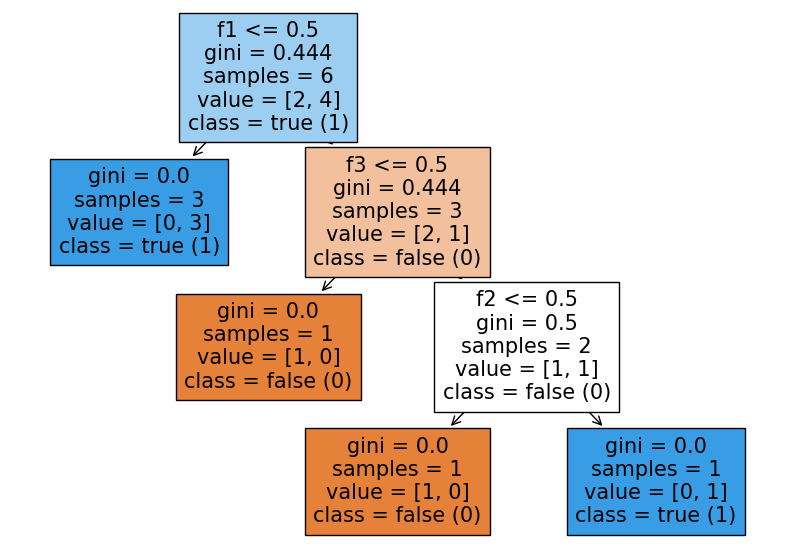

In [11]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf,feature_names= ("f1","f2","f3","f4"),class_names= ("false (0)", "true (1)" ),filled=True)








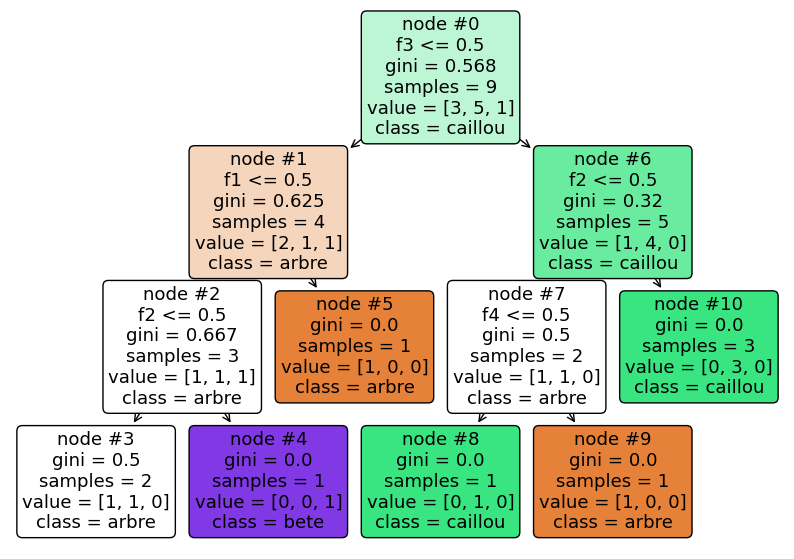

In [12]:
# X is the training set 
# Each example in X has 4 binary features
Xtask = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0],[0,1,1,0],[0,0,0,1],[0,1,1,1]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Ytask = [1, 2, 0, 0, 1, 1,1,0,1]

clftask = tree.DecisionTreeClassifier()
clftask = clf.fit(Xtask, Ytask)


figtask = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clftask,feature_names= ("f1","f2","f3","f4"),class_names= ("arbre", "caillou", "bete"),filled=True,impurity=True,node_ids=True,rounded=True)





Where:
- `figsize` restrains the size of the plot,
- `feature_names` gives the names of the different features,
- `class_names` corresponds to human readable labels for each class,
- `filled` is a boolean indicating a preference to show a colorful tree. 


**Tasks:**
- Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation. 



## PART 3: The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend


Have a look at the original non-binary dataset ([https://www.kaggle.com/danofer/compass](https://www.kaggle.com/danofer/compass)) to understand the different features. Consider in particular the data used for fairness: propublicaCompassRecividism_data_fairml.csv


**Understanding the dataset:**

Take a moment to think about the following questions 

- What are the features? 
The features are the attributes to describe each individual (gender, age, priors, etc.. )
- How many examples in the dataset?
The dataset has 5273 examples
- What are your expectations regarding the most important features? 
The most important features should be priors and age, however, it being based on historical data, maybe human bias will be taken into account.
- Propose (informally) a way to reduce the dataset
The dataset can be reduced using PCA; we keep a set of features that capture the variance of the original ones. We could also group the features that behave similairly. To reduce the nummber of examples, we can remove examples at random.
- There many ways to binarize the dataset. How do you propose to do so?
Putting 1 when the feature fits the example (i.e age(20-24) true or false; and Y =1 when there is recividism.)


Below, we use a binarized version of the dataset that is used in the FairCORELS library (https://github.com/ferryjul/fairCORELS) as well some of its tools. 

You need first to download the dataset and the tools file and put them in your work directory:

- The dataset compass.csv
- The set of tools utils.py

Load the binary dataset `compass.csv` as follows 

In [13]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

print(len(features))

165


Inspect each of these 4 objects. What do they represent? How many features? examples? 
Theres 5273 exampes and 165 features
Have a look at the different parameters of the `DecisionTreeClassifier` class constructor. We will be studying three parameters: 

- splitter
- max_depth 
- min_samples_leaf 

What do they represent?
 
Splitter : How the quality of the split will be measured, ex: gini, entropy and log_loss

Max_depth: Maximum depth of the tree
Min_samples_leaf : minimum number of samples required to split an internal node.


**Tasks:**

- 1:  Build severals decision trees (different parameters) and visualize them
- 2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*.
- 3: Do again the evaluation using 5-cross-validation
- 4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 
- 5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
- 6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



x_train1, x_test1, y_train1, y_test1 = train_test_split(train_examples, train_labels,random_state=1, test_size = 0.20)





clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=5, min_samples_leaf= 10)
clftask1 = clftask1.fit(x_train1,y_train1)
scores1 = cross_val_score(clftask1, x_train1,y_train1, cv=5)
conf1 = confusion_matrix(y_test1,clftask1.predict(x_test1))

clftask2 = tree.DecisionTreeClassifier(splitter = "best", max_depth=500, min_samples_leaf= 15)
clftask2 = clftask2.fit(train_examples,train_labels)
scores2 = cross_val_score(clftask2, train_examples, train_labels, cv=5)

clftask3 = tree.DecisionTreeClassifier(splitter = "random", max_depth=5, min_samples_leaf= 10)
clftask3 = clftask2.fit(train_examples,train_labels)
scores3 = cross_val_score(clftask3, train_examples, train_labels, cv=5)


print(scores1.mean() , scores1.std() , " , " , scores2.mean() ,scores2.std(), " , ", scores3.mean(),scores3.std())

print(conf1)


[0.6492891  0.67298578 0.66232227 0.6975089  0.65599051] 0.016861023723982314  ,  0.6631896543971509 0.008557670518915964  ,  0.6631896543971509 0.008557670518915964
[[441 101]
 [232 281]]


the best score is obtained with best and a low max_depth, with a score of 0.667, and a standard deviation of 0.017
std is quite high compared to the other classifiers, which means that the scores are quite dispersed


**TEST 1:** 
To test if the algorithm is fair to a certain ethnic group, we'll evaluate without having ethnicity as a feature
 and then we'll take a sample of this group as our y_test.

**TEST 2:**
Run the algorithm using only caucasian people, and then run it using only african american people, without having ethniticy as a feature
 and then we'll analyse the results

# Final Subject 

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import csv
import numpy as np
from utils import load_from_csv
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")


In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [3]:
clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=1000, min_samples_leaf= 10)

clftask2 = tree.DecisionTreeClassifier(splitter = "random", max_depth=1000, min_samples_leaf= 15)

clftask3 = tree.DecisionTreeClassifier(splitter = "best", max_depth=10, min_samples_leaf= 1)

clftask4 = tree.DecisionTreeClassifier(splitter = "random", max_depth=10, min_samples_leaf= 1)


clftask5 = tree.DecisionTreeClassifier(splitter = "best", max_depth=1000, min_samples_leaf= 40)
clftask6 = tree.DecisionTreeClassifier(splitter = "random", max_depth=1000, min_samples_leaf= 41)


Q2: Train a decision tree for each of the previous configurations on the full dataset

In [4]:
clftask1 = clftask1.fit(train_examples,train_labels)
clftask2 = clftask2.fit(train_examples,train_labels)
clftask3 = clftask3.fit(train_examples,train_labels)
clftask4 = clftask4.fit(train_examples,train_labels)
clftask5 = clftask5.fit(train_examples,train_labels)
clftask6 = clftask6.fit(train_examples,train_labels)

Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [5]:
scores1 = cross_val_score(clftask1, train_examples,train_labels, cv=5)
scores2 = cross_val_score(clftask4, train_examples,train_labels, cv=5)


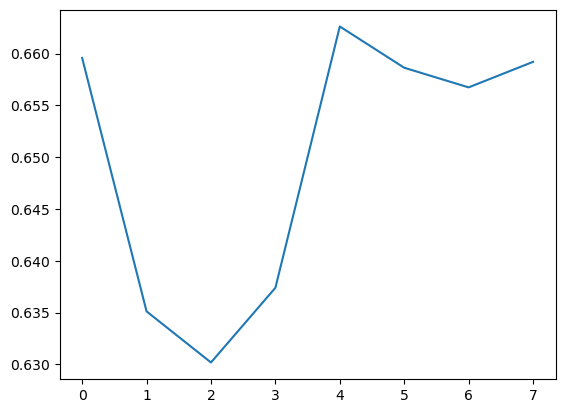

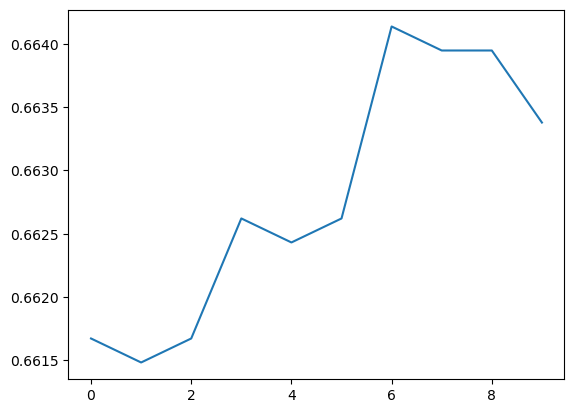

In [29]:
def plot_scoresDepth():
    scores = []
    clftask0 = tree.DecisionTreeClassifier(splitter = "best", max_depth=None, min_samples_leaf= 10)
    scores0 = cross_val_score(clftask0, train_examples,train_labels, cv=5)
    scores.append(scores0.mean())
    for i in range (1,8):
        depth = i
        clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=depth, min_samples_leaf= 10)
        scores1 = cross_val_score(clftask1, train_examples,train_labels, cv=5)
        scores.append(scores1.mean())
    plt.plot(scores)
    plt.show()
#the best depth is 4
def plot_scores_leaf():   
    scores = []
    clftask0 = tree.DecisionTreeClassifier(splitter = "best", max_depth=4, min_samples_leaf= 1)
    scores0 = cross_val_score(clftask0, train_examples,train_labels, cv=5)
    scores.append(scores0.mean())
    for i in range (1,10):
        leaf = i
        clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=4, min_samples_leaf= leaf*3)
        scores1 = cross_val_score(clftask1, train_examples,train_labels, cv=5)
        scores.append(scores1.mean())
    plt.plot(scores)
    plt.show()
plot_scores()
plot_scores_leaf()
#the best min_leaf is 6

Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

 To change the underfitting to overfitting, we just need to change the max_depth and min_samples_leaf parameters
 when our model has underfitting we can see how the scores increase slowly then decrease when
max_depth becomes too large

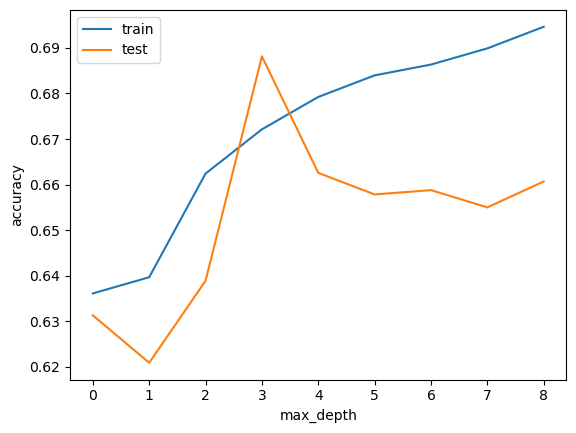

In [46]:

X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2)
train=[]
test=[]

for i in range (1,10):
    clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=i)
    clftask1 = clftask1.fit(X_train,y_train)
    test.append(clftask1.score(X_test,y_test))
    train.append(clftask1.score(X_train,y_train))
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()



Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2)
depth=3
clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=depth)
clftask1 = clftask1.fit(X_train,y_train)
cm=confusion_matrix(y_test,clftask1.predict(X_test))
print(cm)

cmravel=cm.ravel()
print(cmravel)


[[447 102]
 [299 207]]
[447 102 299 207]


Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate

In train_example, the first binary feature indicates if the person is african-american or not.
 The second binary feature indicates if the person is caucasian or not.

In train_labels, 1 indicates that the person has been arrested, 0 indicates that the person has not been arrested.
We will separate the train_examples and train_labels into two groups, one for african-american and one for caucasian.
Then we will train a decision tree for each group and evaluate the accuracy of each tree and their false positive rate.



In [53]:
african_american_examples = []
african_american_labels = []
caucasian_examples = []
caucasian_labels = []

for i in range (len(train_examples)):
    if train_examples[i][0]==1:
        african_american_examples.append(train_examples[i])
        african_american_labels.append(train_labels[i])
    elif train_examples[i][1]==1:
        caucasian_examples.append(train_examples[i])
        caucasian_labels.append(train_labels[i])

afAm_x_train, afAm_x_test, afAm_y_train, afAm_y_test = train_test_split(african_american_examples, african_american_labels, test_size=0.2)
cau_x_train, cau_x_test, cau_y_train, cau_y_test = train_test_split(caucasian_examples, caucasian_labels, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2)

clftask1 = tree.DecisionTreeClassifier(splitter = "best", max_depth=3)
clftask1 = clftask1.fit(afAm_x_train,afAm_y_train)


clftask2 = tree.DecisionTreeClassifier(splitter = "best", max_depth=3)
clftask2 = clftask2.fit(cau_x_train,cau_y_train)

print("accuracy of african-american decision tree: ",clftask1.score(afAm_x_test,afAm_y_test))
print("accuracy of caucasian decision tree: ",clftask2.score(cau_x_test,cau_y_test))

conf1 = confusion_matrix(afAm_y_test,clftask1.predict(afAm_x_test)).ravel()
print("false positive rate of african-american decision tree: ",conf1[1]/(conf1[1]+conf1[3]))

conf2 = confusion_matrix(cau_y_test,clftask2.predict(cau_x_test)).ravel()

print("false positive rate of caucasian decision tree: ",conf2[1]/(conf2[1]+conf2[3]))

#we now train a model that doesnt take ethnicity into account and compare it to the previous model
examples_wo_ethnicity = train_examples[:,2:]
xwoe_train, xwoe_test, ywoe_train, y_woe_test = train_test_split(examples_wo_ethnicity, train_labels, test_size=0.2)
# we exclude the first two features, i.e the etcnicity features
clftask3 = tree.DecisionTreeClassifier(splitter = "best", max_depth=3)
clftask3 = clftask3.fit(xwoe_train,ywoe_train)
print("accuracy of tree without ethnicity: ",clftask3.score(xwoe_test,y_woe_test))
conf3 = confusion_matrix(y_woe_test,clftask3.predict(xwoe_test)).ravel()
print("false positive rate without ethnicity", conf3[1]/(conf3[1]+conf3[3]))

clftask4 = tree.DecisionTreeClassifier(splitter = "best", max_depth=3)
clftask4 = clftask4.fit(train_examples,train_labels)
print("accuracy ",clftask4.score(train_examples,train_labels))
conf4 = confusion_matrix(train_labels,clftask4.predict(train_examples)).ravel()
print("false positive rate ", conf4[1]/(conf4[1]+conf4[3]))

accuracy of african-american decision tree:  0.6251968503937008
accuracy of caucasian decision tree:  0.6571428571428571
false positive rate of african-american decision tree:  0.3968609865470852
false positive rate of caucasian decision tree:  0.28378378378378377
accuracy of tree without ethnicity:  0.6748815165876777
false positive rate without ethnicity 0.35094339622641507
accuracy  0.6408116821543713
false positive rate  0.316052467207995


The false positive rate is significantly higher for african americans, and the score is lower. 
The algorithm is also more accurate when ethnicity is not a feature; 